In [1]:
import pandas as pd

context=pd.read_csv("830024_192_kmeans.csv",encoding='BIG5')
context.head()

,號碼,郵局,緯度,經度,重量,重量單位,一上P,一下P,二上P,二下P,三上P,三下P,四上P,四下P,五上P,五下P
0,0,1,22.501264,120.397632,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,0,22.506868,120.388493,1676.584839,1.0,0.587822,0.999671,0.913426,0.763111,0.568861,0.632286,0.523118,0.703978,0.807067,0.864884
2,2,0,22.486010,120.400615,6148.411019,2.0,0.582753,0.747443,0.649937,0.681374,0.684550,0.620371,0.619439,0.857341,0.724221,0.381915
3,3,0,22.522163,120.406360,124.114011,1.0,0.746498,0.731823,0.679810,0.763334,0.806776,0.824004,0.675502,0.619818,0.773104,0.722029
4,4,0,22.507682,120.369736,688.105452,1.0,0.666587,0.705578,0.514648,0.843268,0.725108,0.562954,0.818020,0.819960,0.761842,0.707871


In [3]:
x=pd.read_csv("830024_20180109.csv",encoding='BIG5')
xx=x[["Column1","Column2","Column9","Column10","Column12"]].copy()
xx.columns=['車牌', '狀態', '經度','緯度','時間']
xx.head()
#按照時間排序

,車牌,狀態,經度,緯度,時間
0,7751-UX,90,120.3997,22.5023,2018/1/9 09:49
1,7751-UX,90,120.3998,22.5021,2018/1/9 09:49
2,7751-UX,90,120.3978,22.5029,2018/1/9 09:51
3,7751-UX,90,120.3977,22.5029,2018/1/9 09:51
4,7751-UX,90,120.3977,22.5011,2018/1/9 09:52


In [4]:
def distance_compute (x1,y1,x2,y2):
    return ((x1-x2)**2+(y1-y2)**2)**0.5

In [5]:
new=xx.copy()
for i in range(0,new.shape[0]):
    x1=new["緯度"].iloc[i]
    y1=new["經度"].iloc[i]
    
    distance_list=[]
    for j in range(0,context.shape[0]):
        x2=context["緯度"].iloc[j]
        y2=context["經度"].iloc[j]
        distance_list.append(distance_compute(x1,y1,x2,y2))
    index=distance_list.index(min(distance_list))
    new["緯度"].iloc[i]=context["緯度"].iloc[index]
    new["經度"].iloc[i]=context["經度"].iloc[index]
new.head()

D:\anaconda\envs\python36\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


,車牌,狀態,經度,緯度,時間
0,7751-UX,90,120.399716,22.501309,2018/1/9 09:49
1,7751-UX,90,120.399716,22.501309,2018/1/9 09:49
2,7751-UX,90,120.397569,22.503130,2018/1/9 09:51
3,7751-UX,90,120.397569,22.503130,2018/1/9 09:51
4,7751-UX,90,120.397632,22.501264,2018/1/9 09:52


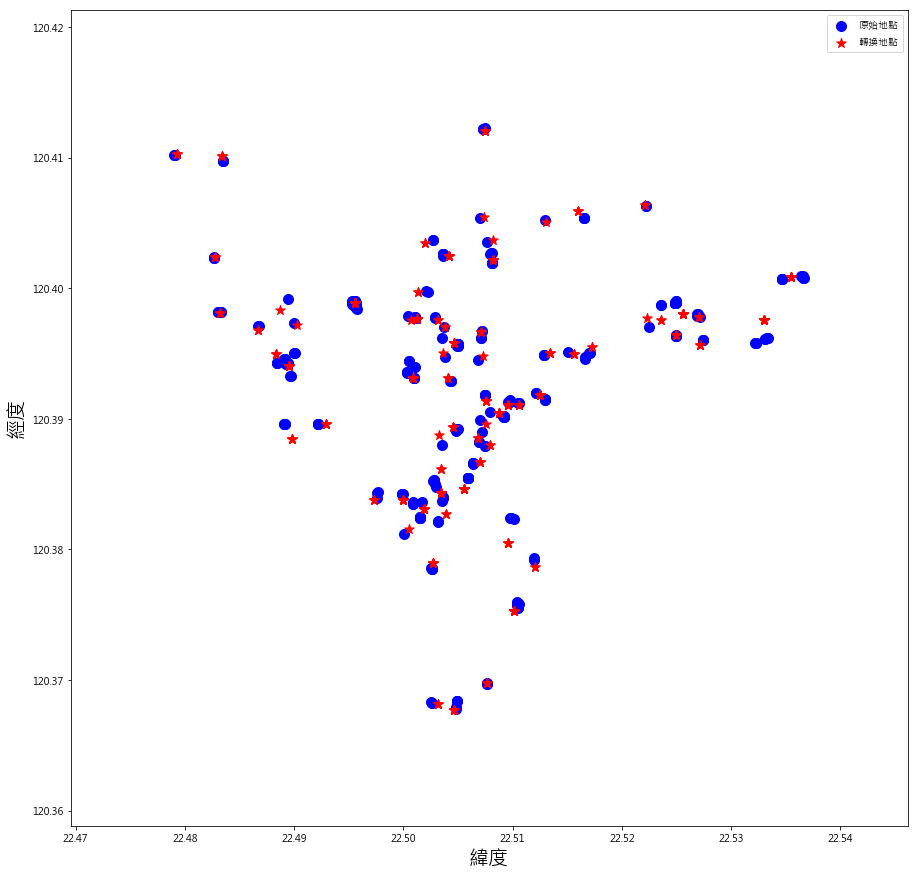

In [39]:
#藍色:路網的點 紅色:原始的點位置
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['Microsoft JhengHei']
plt.rcParams['axes.unicode_minus'] = False
fig = plt.figure(figsize = (15,15))
plt.scatter(xx["緯度"],xx["經度"], marker='o',c='b',s=100,label='原始地點')
plt.scatter(new["緯度"],new["經度"], marker='*',c='r',s=100,label='轉換地點')
plt.xlabel('緯度',fontsize='20')
plt.ylabel('經度',fontsize='20')
plt.legend(loc='upper right')
#plt.xticks(fontsize='30')
#plt.yticks(fontsize='30')
plt.savefig('20180109路網轉換.png', dpi=300)
plt.show()

判斷是不是在同一個地點，如果兩個間距時間很短的資料其經緯度相同代表司機還沒移動到其他地方，表示還在同一個點

In [8]:
test1=list(new["緯度"])
test2=list(new["經度"])

hello=new.copy()
for i in range(1,new.shape[0]):
    if test1[i]==test1[i-1] and test2[i]==test2[i-1]:
        hello=hello.drop(index=i)
print (hello.shape[0])
hello.head()

77


,車牌,狀態,經度,緯度,時間
0,7751-UX,90,120.399716,22.501309,2018/1/9 09:49
2,7751-UX,90,120.397569,22.503130,2018/1/9 09:51
4,7751-UX,90,120.397632,22.501264,2018/1/9 09:52
16,7751-UX,90,120.403423,22.502016,2018/1/9 10:01
18,7751-UX,90,120.402486,22.504156,2018/1/9 10:04


In [26]:
post_box=pd.read_csv("林園區郵筒位置.csv",encoding='BIG5')
post_box

,Unnamed: 0,村里,路名,描述,服務單位,緯度,經度
0,0,龔厝里,前厝路28號,(三清殿斜對面),普通信箱,22.50736,120.37654
1,1,潭頭里,潭頭路190號,NaN,普通信筒,22.52452,120.39647
2,2,林內里,林內路153號,(三庄郵局門口),普通信筒,22.53492,120.40141
3,3,東林里,福興街104號,(福興郵局門口),普通信筒,22.50514,120.39474
4,4,東林里,鳳林路一段176號,(林園郵局門口),普通信筒,22.50589,120.39709
5,5,王公里,王公路58巷5號,(東方新都大樓警衛室前),普通信筒,22.51253,120.39161
6,6,林內里,林內路153號,(三庄郵局門口),限時信筒,22.53492,120.40141
7,7,東林里,福興街104號,(福興郵局門口),限時信筒,22.50514,120.39474
8,8,東林里,鳳林路一段176號,(林園郵局門口),限時信筒,22.50589,120.39709
9,9,仁愛里,信義路26號,NaN,限時普通雙用信箱,22.50768,120.39165


In [27]:
new_post=post_box.copy()
for i in range(0,new_post.shape[0]):
    x1=new_post["緯度"].iloc[i]
    y1=new_post["經度"].iloc[i]
    
    distance_list=[]
    for j in range(0,context.shape[0]):
        x2=context["緯度"].iloc[j]
        y2=context["經度"].iloc[j]
        distance_list.append(distance_compute(x1,y1,x2,y2))
    index=distance_list.index(min(distance_list))
    new_post["緯度"].iloc[i]=context["緯度"].iloc[index]
    new_post["經度"].iloc[i]=context["經度"].iloc[index]
new_post.head()

D:\anaconda\envs\python36\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


,Unnamed: 0,村里,路名,描述,服務單位,緯度,經度
0,0,龔厝里,前厝路28號,(三清殿斜對面),普通信箱,22.508431,120.376482
1,1,潭頭里,潭頭路190號,NaN,普通信筒,22.524932,120.396404
2,2,林內里,林內路153號,(三庄郵局門口),普通信筒,22.535518,120.400867
3,3,東林里,福興街104號,(福興郵局門口),普通信筒,22.505911,120.395283
4,4,東林里,鳳林路一段176號,(林園郵局門口),普通信筒,22.506218,120.397396


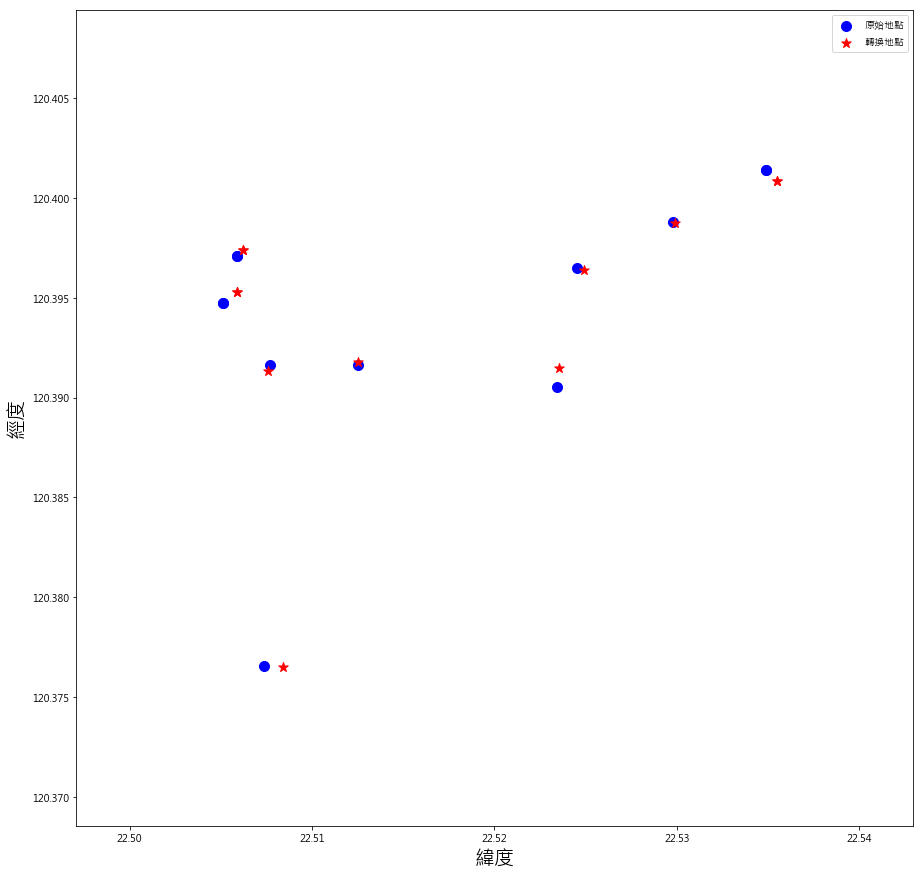

In [41]:
fig = plt.figure(figsize = (15,15))
plt.scatter(post_box["緯度"],post_box["經度"], marker='o',c='b',s=100,label='原始地點')
plt.scatter(new_post["緯度"],new_post["經度"], marker='*',c='r',s=100,label='轉換地點')
plt.xlabel('緯度',fontsize='20')
plt.ylabel('經度',fontsize='20')
plt.legend(loc='upper right')
plt.savefig('郵筒位置轉換.png', dpi=300)
plt.show()

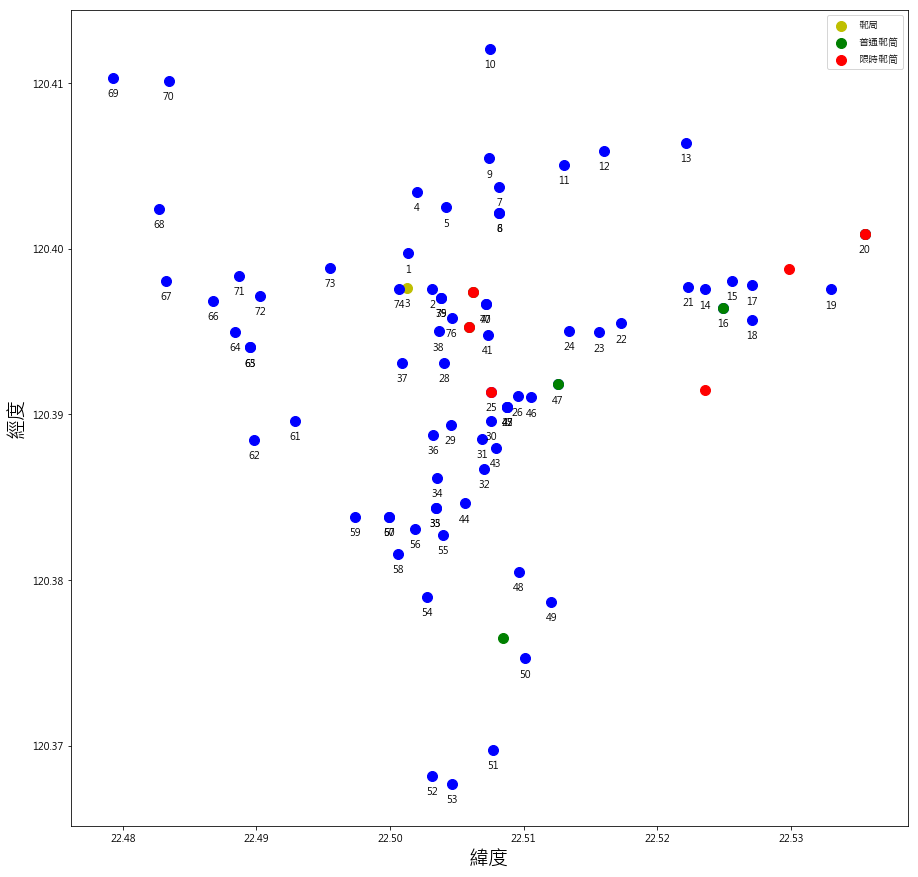

In [42]:
fig = plt.figure(figsize = (15,15))
for i in range(hello.shape[0]):
    if hello["緯度"].iloc[i]==context["緯度"].iloc[0]:
        plt.scatter(hello["緯度"].iloc[i],hello["經度"].iloc[i], marker='o',c='y',s=100,label='郵局')
    else:
        plt.scatter(hello["緯度"].iloc[i],hello["經度"].iloc[i], marker='o',c='b',s=100)

plt.scatter(new_post["緯度"].iloc[:6],new_post["經度"].iloc[:6], marker='o',c='g',s=100,label='普通郵筒')
plt.scatter(new_post["緯度"].iloc[6:],new_post["經度"].iloc[6:], marker='o',c='r',s=100,label='限時郵筒')
        
plt.xlabel('緯度',fontsize='20')
plt.ylabel('經度',fontsize='20')
plt.legend(loc='upper right')
for i in range(hello.shape[0]):
    plt.annotate(
        '%d' %(i+1),
        xy=(hello["緯度"].iloc[i], hello["經度"].iloc[i]),
        xytext=(0, -10),
        textcoords='offset points',
        ha='center',
        va='top')
    
plt.legend(loc='upper right')
plt.savefig('20180109郵務車路線圖.png', dpi=300)
plt.show()

In [10]:
final =pd.merge(hello,context)
final.sort_values('時間', inplace=True)
final

,車牌,狀態,經度,緯度,時間,號碼,郵局,重量,重量單位,一上P,一下P,二上P,二下P,三上P,三下P,四上P,四下P,五上P,五下P
0,7751-UX,90,120.399716,22.501309,2018/1/9 09:49,113,0,2090.784129,1.0,0.775161,0.785281,0.679782,0.780428,0.701222,0.729811,0.821305,0.661099,0.830900,0.723469
1,7751-UX,90,120.397569,22.503130,2018/1/9 09:51,169,0,816.251747,1.0,0.559474,0.816826,0.725870,0.653760,0.853107,0.801986,0.620929,0.532043,0.735154,0.760208
2,7751-UX,90,120.397632,22.501264,2018/1/9 09:52,0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,7751-UX,90,120.403423,22.502016,2018/1/9 10:01,76,0,3308.721768,1.0,0.603780,1.011024,0.894810,0.666341,0.577361,0.820836,0.657407,0.651597,0.800602,0.848968
4,7751-UX,90,120.402486,22.504156,2018/1/9 10:04,30,0,3260.890830,1.0,0.761044,0.569011,0.718244,0.651698,0.545938,0.780638,0.740502,0.619582,0.838239,0.661718
5,7751-UX,90,120.402170,22.508167,2018/1/9 10:09,99,0,999.484930,1.0,0.839183,0.769204,0.733000,0.514073,0.837399,0.764468,0.717737,0.771540,0.648695,0.671912
7,7751-UX,90,120.403715,22.508175,2018/1/9 10:10,65,0,1060.866203,1.0,0.697785,0.499834,0.638258,0.650641,0.589984,0.771923,0.687256,0.862427,0.784960,0.613496
6,7751-UX,90,120.402170,22.508167,2018/1/9 10:11,99,0,999.484930,1.0,0.839183,0.769204,0.733000,0.514073,0.837399,0.764468,0.717737,0.771540,0.648695,0.671912
8,7751-UX,90,120.405450,22.507431,2018/1/9 10:15,101,0,1913.281485,1.0,0.626739,0.816779,0.625161,0.682053,0.471998,0.797416,0.466839,0.800540,0.627932,0.645929
9,7751-UX,90,120.412054,22.507514,2018/1/9 10:17,8,0,13629.437080,3.0,0.714691,0.674438,0.619086,0.702774,0.672021,0.393184,0.586199,0.670888,0.585873,0.662716


In [11]:
new

,車牌,狀態,經度,緯度,時間
0,7751-UX,90,120.399716,22.501309,2018/1/9 09:49
1,7751-UX,90,120.399716,22.501309,2018/1/9 09:49
2,7751-UX,90,120.397569,22.503130,2018/1/9 09:51
3,7751-UX,90,120.397569,22.503130,2018/1/9 09:51
4,7751-UX,90,120.397632,22.501264,2018/1/9 09:52
5,7751-UX,90,120.397632,22.501264,2018/1/9 09:53
6,7751-UX,90,120.397632,22.501264,2018/1/9 09:53
7,7751-UX,90,120.397632,22.501264,2018/1/9 09:54
8,7751-UX,90,120.397632,22.501264,2018/1/9 09:54
9,7751-UX,90,120.397632,22.501264,2018/1/9 09:55


In [12]:
context['經度'].iloc[0]

120.397632

In [13]:
b= new["緯度"] == context['緯度'].iloc[0]
dict1 = {}
for key in b:
    dict1[key] = dict1.get(key, 0) + 1
print (dict1)

{False: 288, True: 12}


In [14]:
new[b]

,車牌,狀態,經度,緯度,時間
4,7751-UX,90,120.397632,22.501264,2018/1/9 09:52
5,7751-UX,90,120.397632,22.501264,2018/1/9 09:53
6,7751-UX,90,120.397632,22.501264,2018/1/9 09:53
7,7751-UX,90,120.397632,22.501264,2018/1/9 09:54
8,7751-UX,90,120.397632,22.501264,2018/1/9 09:54
9,7751-UX,90,120.397632,22.501264,2018/1/9 09:55
10,7751-UX,90,120.397632,22.501264,2018/1/9 09:55
11,7751-UX,90,120.397632,22.501264,2018/1/9 09:56
12,7751-UX,90,120.397632,22.501264,2018/1/9 09:56
13,7751-UX,90,120.397632,22.501264,2018/1/9 09:57


In [15]:
import os
os.getcwd()
final.to_csv('Result.csv',encoding='BIG5')